# Implementation Of A Neural Network
From: Make your own neural network 
By: Tariq Rashid 

In [149]:
import numpy
import scipy.special

import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
class neuralNetwork:
    
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        self.lr = learningRate
        
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    def train(self, inputs_list, targets_list):
        #convert inputs list into a 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #calculate the signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        #calculate the signals from the hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        #calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass
    def query(self, input_list):
        inputs = numpy.array(input_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)        #X = W * I
        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [151]:
input_nodes = 784 #28 * 28
hidden_nodes = 100
output_nodes = 10 #a number 0-9

learningRate = 0.2

#instance of a neural network
net = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learningRate)

#load the minst training data into a list
data_file = open("mnist_train.csv", 'r')
data_list = data_file.readlines()
data_file.close()

#train the neural network

#going through all the records in the training data
#splitting the commas
for record in data_list:
    all_values = record.split(',')
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    #create the target output values
    targets = numpy.zeros(output_nodes) + 0.01
    #all_values[0] is the target label
    targets[int(all_values[0])] = 0.99
    net.train(inputs, targets)

7


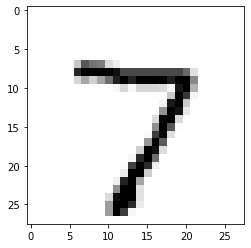

In [152]:
#load the mnist test data into a list
test_data_file = open("mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

#get the first test record
all_values = test_data_list[0].split(',')
#print the label
print(all_values[0])

#What the answer should be
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')


In [153]:
#what the neural net guesses (the higher the number the bigger the probability)
#net.query((numpy.asfarray(all_values[1:]) / 255. * 0.99) + 0.01)

In [154]:
#test the neural network
scorecard = [] #to see how well the net preforms

#go through all the records in the test data set 
for record in test_data_list:
    all_values = record.split(',')
    #print what the net should predict
    correct_label = int(all_values[0])
    #print(correct_label, "Correct label")
    #scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = net.query(inputs)
    #the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "Networks answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    
#print("Answers correct:",scorecard)
summ = 0
for i in scorecard:
    if i == 1:
        summ += 1
print(f"Correct answers: {summ} out of {numpy.array(scorecard).size} thats {(numpy.array(scorecard).sum() / numpy.array(scorecard).size) * 100}%")    

Correct answers: 9522 out of 10000 thats 95.22%
